In [22]:
import os
import librosa
import librosa.display
import ffmpeg
import glob
import matplotlib.pyplot as plt
import numpy as np

In [23]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
    
    return mfccs,chroma,mel,contrast,tonnetz

In [24]:
def parse_audio_files(filenames):
    rows = len(filenames)
    features, labels, groups = np.zeros((rows,193)), np.zeros((rows,3)), np.zeros((rows, 1))
    i = 0
    for fn in filenames:
        try:
            mfccs, chroma, mel, contrast,tonnetz = extract_feature(fn)
            ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
            y_col = int(fn.split('/')[3].split('-')[1])
            group = int(fn.split('/')[3].split('-')[0])
        except:
            print(fn)
        else:
            features[i] = ext_features
            labels[i, y_col] = 1
            groups[i] = group
            i += 1
    return features, labels, groups

In [25]:
frame_length = 1050
frame_stride = 10

Text(0.5, 1.0, 'Log-frequency power spectrogram')

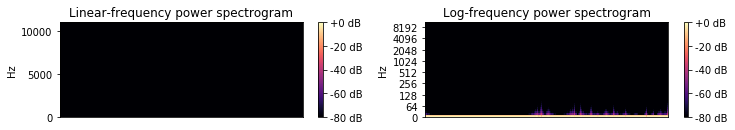

In [26]:
import matplotlib.pyplot as plt
y, sr = librosa.load('recording.wav')
plt.figure(figsize=(12, 8))

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

plt.subplot(4, 2, 2)
librosa.display.specshow(D, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')